In [1]:
import time
import psutil
import matplotlib.pyplot as plt 
import numpy as np

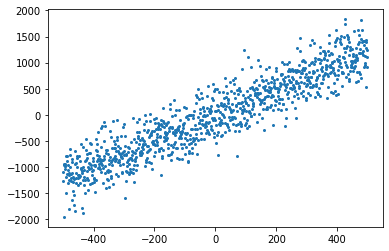

In [2]:
# Let us create some random data
mu, sigma = 5, 300 # mean and standard deviation
error=np.random.normal(mu, sigma, 1000)

x = np.arange(-500 ,  500 )
y = (2.5 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

In [3]:
%matplotlib notebook 
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


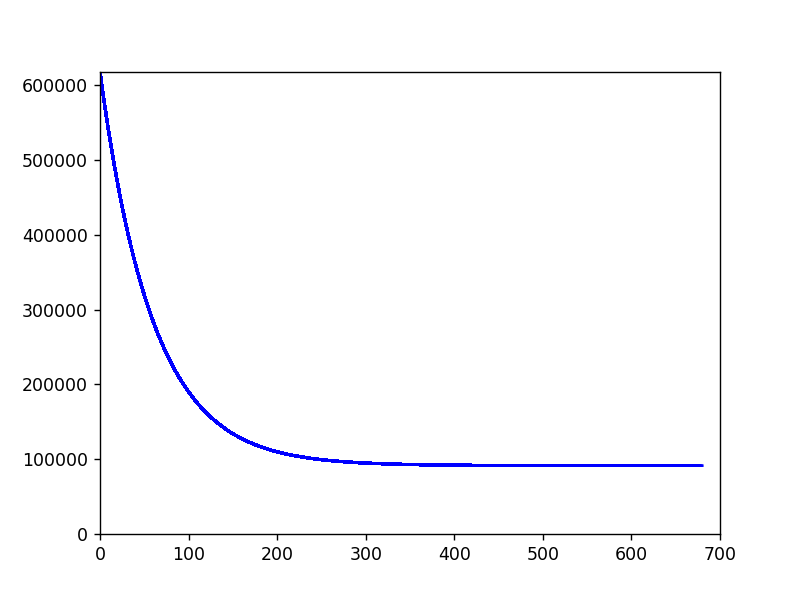

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [5]:
b_current = 0 
m_current = 0

learningRate = 0.0000001
num_iteration = 700 

precision = 0.1


previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y - y_prediction)**2)

ax.set_xlim(left = 0, right=num_iteration)
ax.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y - y_prediction)**2)

    # calculate gradients. 
    m_gradient = (-1.0/n) * sum (x*(y - y_prediction) )
    b_gradient = (-1.0/n) * sum (y - y_prediction)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    xx.append(i)
    costHist.append(cost)    
    ax.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    
    if(i % 10 ==0):
        print("Iteration No.=", i , " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 1000.0
Iteration No.= 0  Cost= 617968.9481408206
Iteration No.= 10  Cost= 536821.6022232173
Iteration No.= 20  Cost= 468179.830995242
Iteration No.= 30  Cost= 410116.4069203531
Iteration No.= 40  Cost= 361001.1064838009
Iteration No.= 50  Cost= 319454.93905907136
Iteration No.= 60  Cost= 284311.4295396494
Iteration No.= 70  Cost= 254583.86768403178
Iteration No.= 80  Cost= 229437.60464694697
Iteration No.= 90  Cost= 208166.6188775818
Iteration No.= 100  Cost= 190173.69343489726
Iteration No.= 110  Cost= 174953.6481664565
Iteration No.= 120  Cost= 162079.15596735186
Iteration No.= 130  Cost= 151188.74488800665
Iteration No.= 140  Cost= 141976.64923083165
Iteration No.= 150  Cost= 134184.22468903774
Iteration No.= 160  Cost= 127592.68649388736
Iteration No.= 170  Cost= 122016.96668225764
Iteration No.= 180  Cost= 117300.5180174609
Iteration No.= 190  Cost= 113310.91867510119
Iteration No.= 200  Cost= 109936.15428847526
Iteration No.= 210  Cost= 107081.47296600518
Iteration No